In [12]:
### Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
### Load the Datasets
df2016 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2016.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2017.csv')
df2018 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2018.csv')

### Quick preprocessing
df_all = pd.concat([df2016,df2017,df2018], ignore_index = True, axis = 0)
df_all.drop(['Unnamed: 0','CANCELLED','DIVERTED'], axis=1, inplace= True)
df_all.dropna(inplace=True)
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'])

### New column OP-Carrier code to full Airline Name
df_all['AIRLINE'] = df_all['OP_CARRIER'].apply(lambda x: 'Delta Airlines' if x == 'DL' else 'Southwest Airlines' if x=='WN' else 'American Airlines' if x=='AA' 
else 'JetBlue Airways' if x=='B6' else 'SkyWest Airlines' if x=='OO' else 'Atlantic Southeast Airlines' if x == 'EV' else 'United Airlines' if x == 'UA' 
else 'Pinnacle Airlines' if x == '9E' else 'Spirit Airlines' if x== 'NK' else 'Alaska Airlines' if x == 'AS' else 'Virgin America' if x == 'VX' else 'Frontier' if x =='F9' 
else 'Republic Airlines' if x == 'YX'else 'Hawaiian Airlines' if x == 'HA' else 'Envoy Air' if x == 'MQ' else 'Air Shuttle' if x == 'YV' else 'Allegiant Air' if x=='G4' 
else 'Comair')

df_all.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,AIR_TIME,DISTANCE,AIRLINE
0,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,2321,2319.0,92.0,640.0,Delta Airlines
1,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,600,547.0,207.0,1947.0,Delta Airlines
2,2016-01-01,DL,ATL,BNA,1233,1356.0,83.0,1239,1402.0,38.0,214.0,Delta Airlines
3,2016-01-01,DL,ATL,JAX,945,946.0,1.0,1050,1053.0,45.0,270.0,Delta Airlines
4,2016-01-01,DL,ATL,OKC,2110,2107.0,-3.0,2236,2224.0,116.0,761.0,Delta Airlines


In [14]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080873 entries, 0 to 2109730
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   OP_CARRIER    object        
 2   ORIGIN        object        
 3   DEST          object        
 4   CRS_DEP_TIME  int64         
 5   DEP_TIME      float64       
 6   DEP_DELAY     float64       
 7   CRS_ARR_TIME  int64         
 8   ARR_TIME      float64       
 9   AIR_TIME      float64       
 10  DISTANCE      float64       
 11  AIRLINE       object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 206.4+ MB


<AxesSubplot:xlabel='ORIGIN', ylabel='DEP_DELAY'>

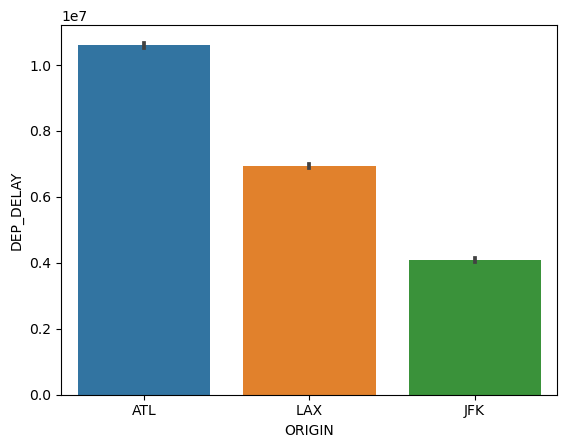

In [15]:
sns.barplot(data = df_all, x = 'ORIGIN', y='DEP_DELAY',estimator='sum')

<AxesSubplot:>

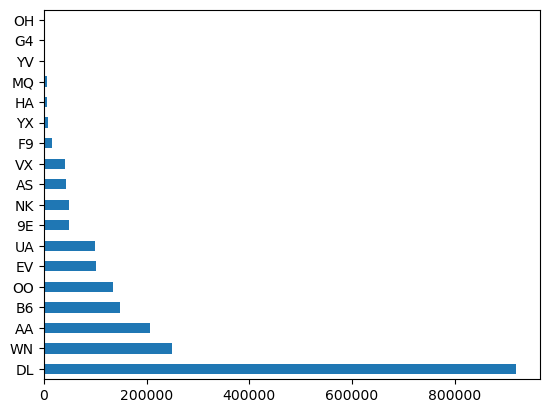

In [16]:
df_all['OP_CARRIER'].value_counts().plot(kind='barh')

<AxesSubplot:>

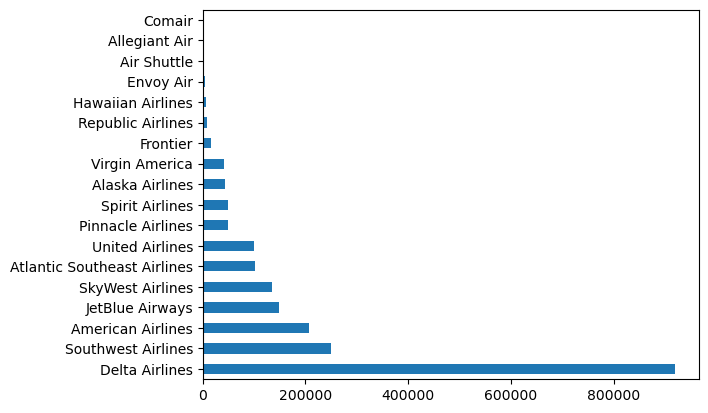

In [17]:
df_all['AIRLINE'].value_counts().plot(kind='barh')

<AxesSubplot:ylabel='AIRLINE'>

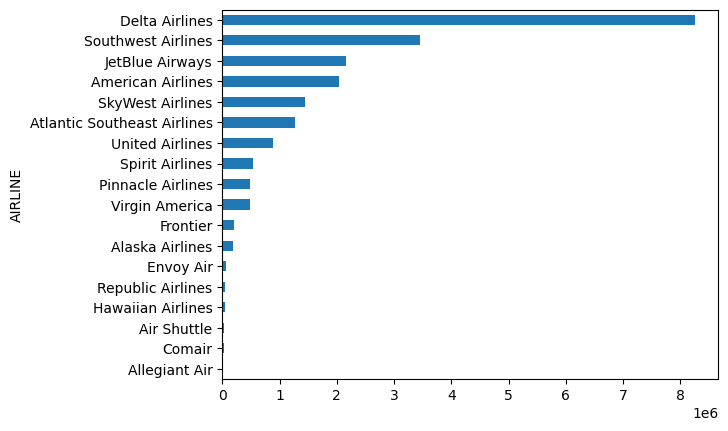

In [18]:
df_all.groupby('AIRLINE')['DEP_DELAY'].sum().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='AIRLINE'>

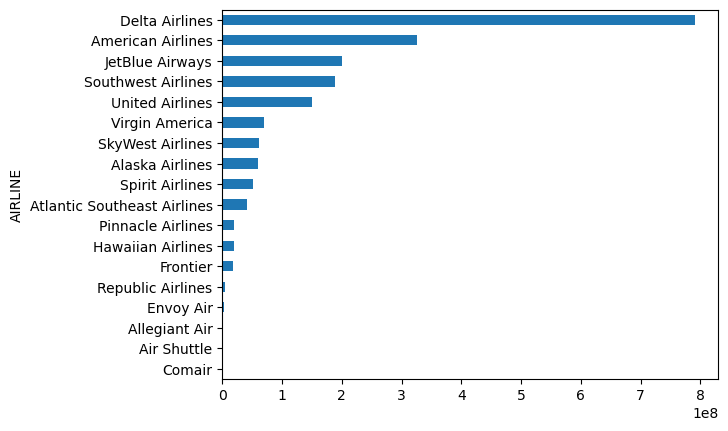

In [19]:
df_all.groupby('AIRLINE')['DISTANCE'].sum().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='AIRLINE'>

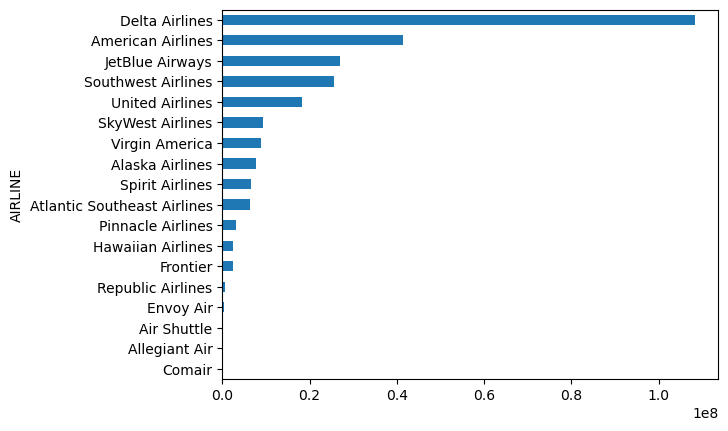

In [20]:
df_all.groupby('AIRLINE')['AIR_TIME'].sum().sort_values().plot(kind='barh')

In [21]:
df_airport_ATL_p02 = df_all.pivot_table(values = 'DEP_DELAY', index = ['ORIGIN', 'DEST','AIRLINE'], aggfunc = 'sum').sort_values(by = 'DEP_DELAY', ascending = False)
df_airport_ATL_p02

DEP_DELAY
ORIGIN DEST AIRLINE                      
ATL    EWR  Delta Airlines       236562.0
       LGA  Delta Airlines       233796.0
LAX    SFO  Southwest Airlines   212361.0
       OAK  Southwest Airlines   181341.0
       JFK  Delta Airlines       165150.0
...                                   ...
       PHL  Virgin America         -174.0
JFK    SNA  Delta Airlines         -218.0
       SJC  Delta Airlines         -287.0
ATL    PDX  Alaska Airlines        -294.0
LAX    AUS  United Airlines        -590.0

[995 rows x 1 columns]

In [22]:
df_airport_ATL_p= df_all.pivot_table(values = 'DEP_DELAY', index = ['ORIGIN', 'DEST'], aggfunc = 'sum').sort_values(by = 'DEP_DELAY', ascending = False)
df_airport_ATL_p

DEP_DELAY
ORIGIN DEST           
LAX    SFO    784071.0
       JFK    506009.0
ATL    EWR    360408.0
       LGA    360265.0
JFK    LAX    348187.0
...                ...
LAX    FSD       -23.0
       DSM       -33.0
       LIT       -75.0
       CID      -122.0
JFK    SNA      -218.0

[347 rows x 1 columns]